# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | midvagur
Processing Record 3 of Set 1 | cable beach
City not found. Skipping...
Processing Record 4 of Set 1 | queenstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | narok
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | selfoss
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | colonia
Processing Record 15 of Set 1 | oeiras do para
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | suva
Processing Record 20 of Set 1 | kenai
Processing Record 21 of Set 1 | stanley
Processing Record 22 of 

Processing Record 39 of Set 4 | jayapura
Processing Record 40 of Set 4 | manado
Processing Record 41 of Set 4 | sisimiut
Processing Record 42 of Set 4 | alo
Processing Record 43 of Set 4 | jurm
Processing Record 44 of Set 4 | bandar-e lengeh
Processing Record 45 of Set 4 | atafu village
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | benguela
Processing Record 49 of Set 4 | ghat
Processing Record 0 of Set 5 | crane
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | vilyuysk
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | kingston
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | arkhangel'sk
Processing Record 7 of Set 5 | karangampel
Processing Record 8 of Set 5 | svetlyy
Processing Record 9 of Set 5 | constantia
Processing Record 10 of Set 5 | lazaro cardenas
Processing Record 11 of Set 5 | mitchell
Processing Record 12 of Set 5 | mawlamyinegyunn
Processing 

Processing Record 33 of Set 8 | kristiansund
Processing Record 34 of Set 8 | bukama
Processing Record 35 of Set 8 | songea
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | tannum sands
Processing Record 38 of Set 8 | kostomuksha
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | north elba
Processing Record 41 of Set 8 | sinabang
Processing Record 42 of Set 8 | francistown
Processing Record 43 of Set 8 | kendari
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | markala
Processing Record 46 of Set 8 | tolanaro
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | dudinka
Processing Record 49 of Set 8 | caleta de carquin
Processing Record 0 of Set 9 | strezhevoy
Processing Record 1 of Set 9 | mar del plata
Processing Record 2 of Set 9 | afif
Processing Record 3 of Set 9 | ixtapa
Processing Record 4 of Set 9 | bathsheba
Processing Record 5 of Set 9 | ouellah
City not found. Skipping...
Processing Reco

Processing Record 29 of Set 12 | floro
Processing Record 30 of Set 12 | panama city beach
Processing Record 31 of Set 12 | cabo san lucas
Processing Record 32 of Set 12 | zaozersk
Processing Record 33 of Set 12 | fisterra
Processing Record 34 of Set 12 | belozersk
Processing Record 35 of Set 12 | sao jose da coroa grande
Processing Record 36 of Set 12 | fort st. john
Processing Record 37 of Set 12 | ust'-ilimsk
Processing Record 38 of Set 12 | birmitrapur
Processing Record 39 of Set 12 | al jawf
Processing Record 40 of Set 12 | maxixe
Processing Record 41 of Set 12 | bondo
Processing Record 42 of Set 12 | florence
Processing Record 43 of Set 12 | tupiza
Processing Record 44 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 45 of Set 12 | doda
Processing Record 46 of Set 12 | vauvert
Processing Record 47 of Set 12 | show low
Processing Record 48 of Set 12 | winnemucca
Processing Record 49 of Set 12 | barah
Processing Record 0 of Set 13 | pinhao
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [5]:
# Convert the temperature unit from Kelvin to Celcius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,11.90,68,75,4.63,CA,1717950577
1,midvagur,62.0511,-7.1939,7.46,87,100,6.69,FO,1717950941
2,queenstown,-31.8976,26.8753,10.86,49,0,2.61,ZA,1717950883
3,grytviken,-54.2811,-36.5092,-4.92,76,21,6.91,GS,1717950872
4,east london,-33.0153,27.9116,13.52,88,0,1.54,ZA,1717950607


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.90,68,75,4.63,CA,1717950577
1,midvagur,62.0511,-7.1939,7.46,87,100,6.69,FO,1717950941
2,queenstown,-31.8976,26.8753,10.86,49,0,2.61,ZA,1717950883
3,grytviken,-54.2811,-36.5092,-4.92,76,21,6.91,GS,1717950872
4,east london,-33.0153,27.9116,13.52,88,0,1.54,ZA,1717950607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

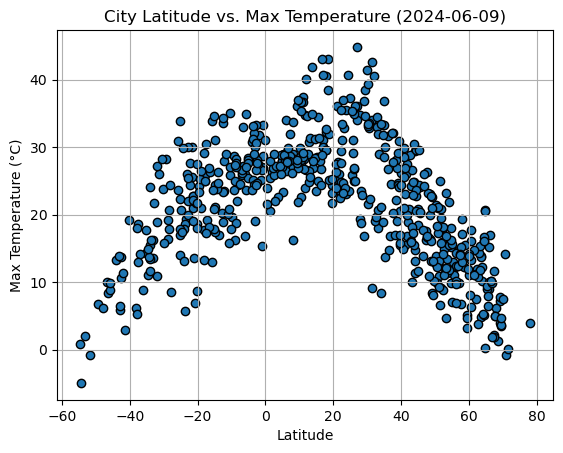

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-09)")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

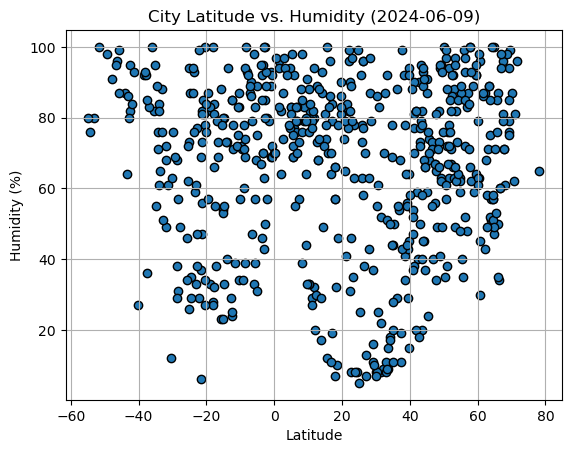

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-09)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

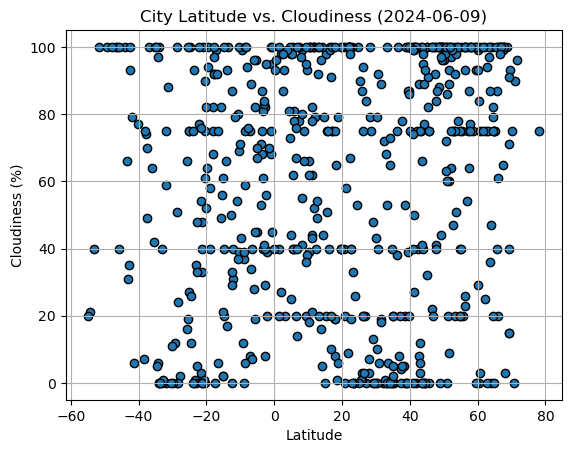

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-09)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

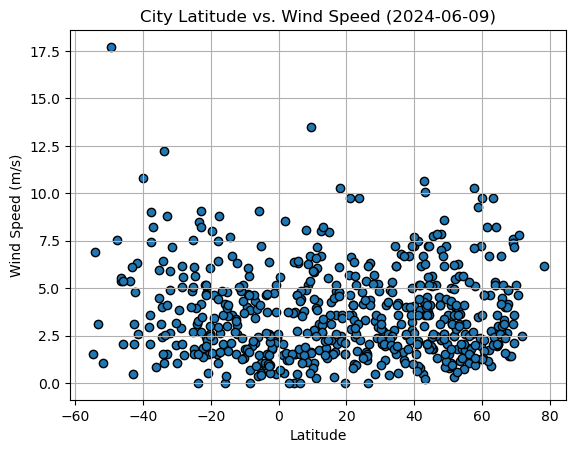

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-09)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    
    # Calculate the regression line values
    regression_line = slope * x + intercept
    
    # Plot the regression line
    plt.plot(x, regression_line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Return the r-value
    return rvalue, slope, intercept

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,11.90,68,75,4.63,CA,1717950577
1,midvagur,62.0511,-7.1939,7.46,87,100,6.69,FO,1717950941
5,keflavik,64.0049,-22.5624,10.24,57,0,5.14,IS,1717950941
7,kidal,18.4411,1.4078,43.07,10,1,2.47,ML,1717950941
8,selfoss,63.9331,-20.9971,12.22,51,47,5.30,IS,1717950941


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,queenstown,-31.8976,26.8753,10.86,49,0,2.61,ZA,1717950883
3,grytviken,-54.2811,-36.5092,-4.92,76,21,6.91,GS,1717950872
4,east london,-33.0153,27.9116,13.52,88,0,1.54,ZA,1717950607
6,narok,-1.0783,35.8601,15.38,93,100,2.45,KE,1717950941
9,waitangi,-43.9535,-176.5597,13.23,87,100,5.36,NZ,1717950872


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7516425553622632


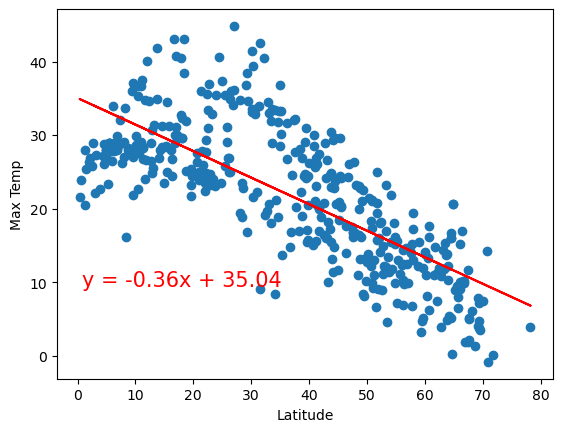

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7267581691967951


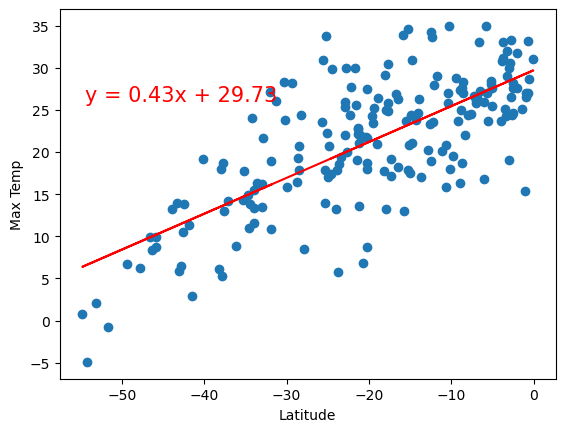

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** <br> The maximum temperature in both graphs is higher closer to the equator (latitude zero). Essentially, the greater the absolute distance from latitude 0, the lower the maximum temperature. This is evidenced by the negative and positive r-values for the northern and southern hemispheres, respectively.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.057093670648986836


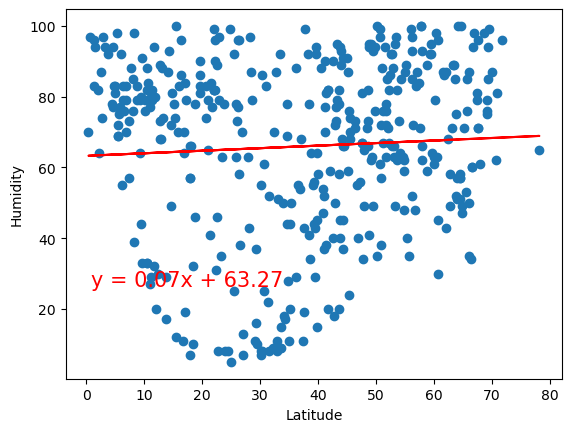

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.07952832034473131


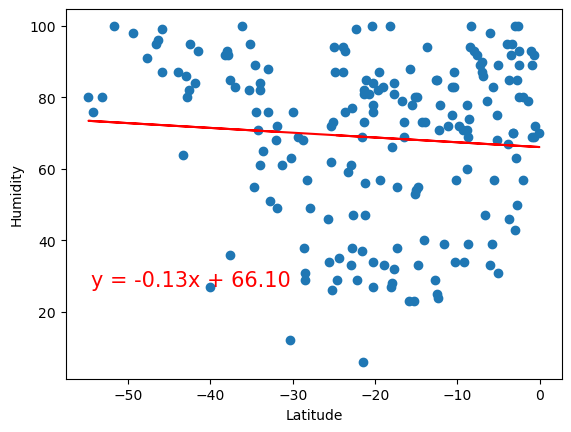

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** <br> Both regression lines indicate that humidity increases as the distance from the equator increases. However, the r-values for both lines are not strong enough to definitively establish a relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11100779397337929


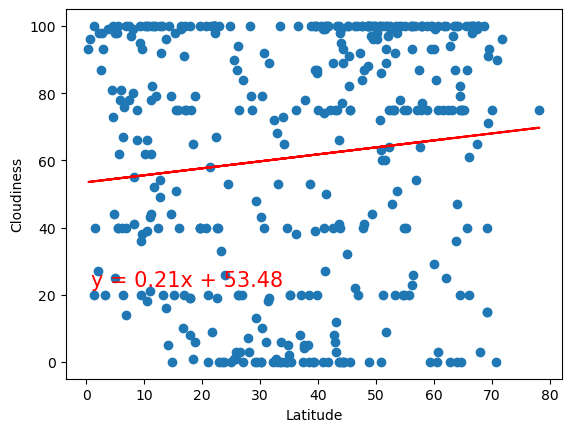

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.048145239376828394


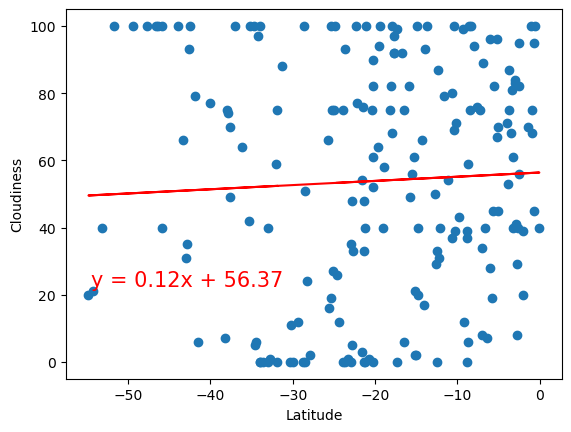

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** <br> Like the relationship between Humidity and Latitude, r-values for both lines are not strong enough to definitively establish a relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04390760677959369


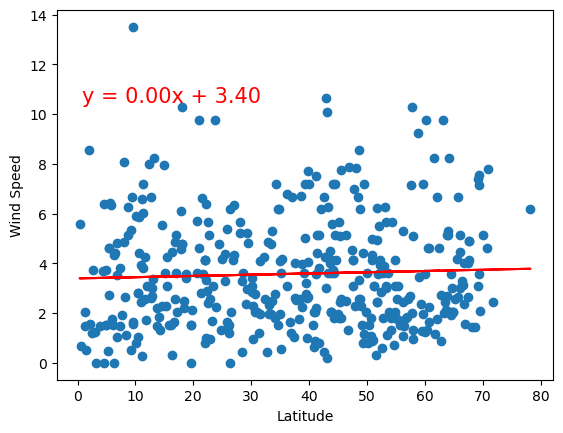

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.29999061374515895


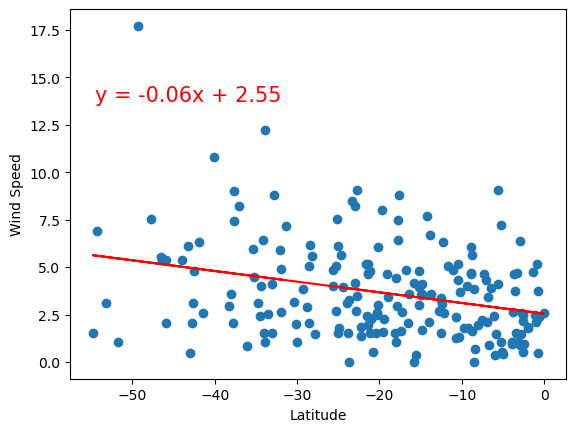

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

x_values = np.array(x_values)
y_values = np.array(y_values)

plt.scatter(x_values, y_values, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

rvalue, slope, intercept = plot_linear_regression(x_values, y_values)

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** <br> r-values for the both lines are small enough to tell that there are no linear regression relationship between Wind Speed and Latitude.